In [1]:
#fetch dataset
from sklearn.datasets import fetch_openml

In [2]:
mnist=fetch_openml('mnist_784')

In [3]:
#divide dataset into features and target variable
x, y = mnist['data'], mnist['target']

In [4]:
#shape of features
x.shape

(70000, 784)

In [5]:
#shape of target variable
y.shape

(70000,)

In [6]:
%matplotlib inline

In [7]:
import matplotlib
import matplotlib.pyplot as plt

In [8]:
#taking a sample digit
digitsample = x[601]
digitsample_img = digitsample.reshape(28,28)

(-0.5, 27.5, 27.5, -0.5)

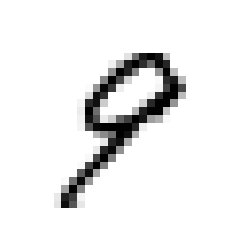

In [9]:
plt.imshow(digitsample_img, cmap = matplotlib.cm.binary, interpolation = "nearest")
plt.axis("off")

In [10]:
#verifying it is the digit '9'
y[601]

'9'

In [11]:
#dividing dataset into train and test datasets
x_train, x_test = x[:60000], x[60000:]

In [12]:
y_train, y_test = y[:60000], y[60000:]

In [13]:
#shuffling the data points
import numpy as np
shuffle = np.random.permutation(60000)
x_train, y_train = x_train[shuffle], y_train[shuffle]

In [14]:
y_train=y_train.astype(np.int8)
y_test=y_test.astype(np.int8)
y_train_2 = (y_train==9)
y_test_2 = (y_test==9)

In [15]:
y_train

array([1, 4, 2, ..., 3, 0, 5], dtype=int8)

In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
#logistic regression model
cf=LogisticRegression()

In [18]:
#fitting the model
cf.fit(x_train, y_train_2)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [19]:
cf.predict([digitsample])

array([ True])

In [20]:
from sklearn.model_selection import cross_val_score
a=cross_val_score(cf, x_train, y_train_2, cv=3, scoring="accuracy")

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [21]:
#avg accuracy of model
a.mean()

0.9591666666666668